In [125]:
import pandas as pd
import numpy as np
import plotly.express as px
import PyPDF2
from glob import glob
import nltk
import re
import string
from nltk.corpus import stopwords, brown
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [126]:
def read_pdf(file):
    text_result = ""
    pdfFileObject = open(file, 'rb')
    pdfReader = PyPDF2.PdfFileReader(pdfFileObject)
    count = pdfReader.numPages
    for i in range(count):
        page = pdfReader.getPage(i)
        text_result += page.extractText() + " "
    return text_result

In [127]:
df = pd.DataFrame()

In [128]:
list_files = []
list_texts = []
for i in glob(r'T:\3-PROJECTS\Gestion Quantamentale\NLP\ESG/*pdf'):
    try:
        list_files.append(i)
        list_texts.append(read_pdf(i))
    except:
        continue

In [129]:
df['text'] = list_texts

In [130]:
def clean_text(lower_case):
    lower_case = lower_case.lower()
    # split text phrases into words
    words  = nltk.word_tokenize(lower_case)
    
    
    # Create a list of all the punctuations we wish to remove
    punctuations = ['.', ',', '/', '!', '?', ';', ':', '(',')', '[',']', '-', '_', '%']
    
    # Remove all the special characters
    punctuations = re.sub(r'\W', ' ', str(lower_case))
    
    # Initialize the stopwords variable, which is a list of words ('and', 'the', 'i', 'yourself', 'is') that do not hold much values as key words
    stop_words  = stopwords.words('english')
    
    # Getting rid of all the words that contain numbers in them
    w_num = re.sub('\w*\d\w*', ' ', lower_case).strip()
    
    # remove all single characters
    lower_case = re.sub(r'\s+[a-zA-Z]\s+', ' ', lower_case)
    
    # Substituting multiple spaces with single space
    lower_case = re.sub(r'\s+', ' ', lower_case, flags=re.I)
    
    # Removing prefixed 'b'
    lower_case = re.sub(r'^b\s+', '', lower_case)
    
    
    
    # Removing non-english characters
    lower_case = re.sub(r'^b\s+', ' ', lower_case)
    
    lower_case = re.sub(r'\s+', ' ', lower_case, flags=re.I)

    # Return keywords which are not in stop words 
    keywords = [word for word in words if not word in stop_words  and word in punctuations and  word in w_num]
    
    return keywords

In [131]:
df['cleaned_text'] = df['text'].apply(clean_text)

In [132]:
df

,text,cleaned_text
0,Special Report | Research\n 13 November 2020\n...,"[special, report, research, november, barclays..."
1,Special Report | Research\n 27 July 2020\n Ba...,"[special, report, research, july, barclay, cap..."
2,Special Report | Research\n 15 October 2020\n ...,"[special, report, research, october, barclay, ..."
3,Special Report | Research\n 20 January 2021\n ...,"[special, report, research, january, barclays,..."
4,Special Report | Research\n 7 October 2020\n ...,"[special, report, research, october, barclay, ..."
...,...,...
71,\n \nIMPORTANT. Please refer to keplercheuvre...,"[important, please, refer, disclaimer, researc..."
72,\n \nIMPORTANT. Please refer to keplercheuvre...,"[important, please, refer, disclaimer, researc..."
73,\n \nIMPORTANT. Please refer to keplercheuvre...,"[important, please, refer, disclaimer, researc..."
74,\n \nIMPORTANT. \nPlease refer at the back of...,"[important, please, refer, back, report, impor..."


In [133]:
from gensim.models import word2vec

model = word2vec.Word2Vec(df.cleaned_text.values.tolist())

In [134]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

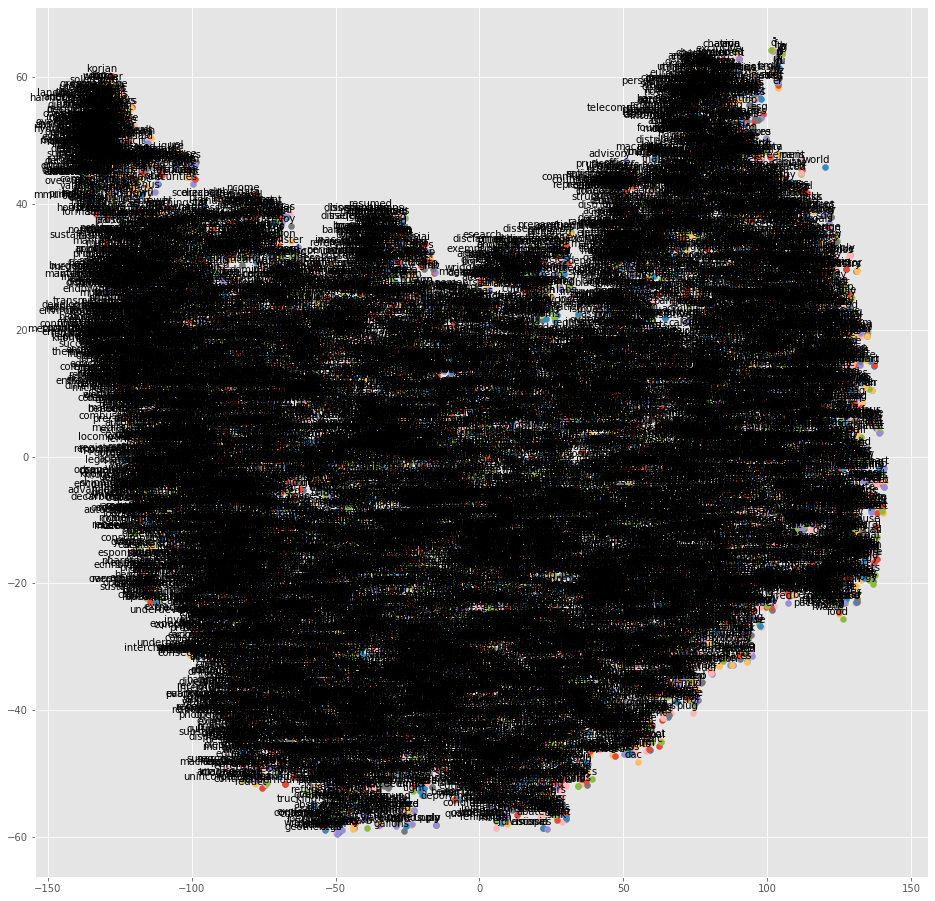

In [135]:
tsne_plot(model)

In [136]:
model = word2vec.Word2Vec(df.cleaned_text.values.tolist(), size=100, window=20, min_count=20, workers=4)
#tsne_plot(model)

In [137]:
# Transcripts 
# Test ESG model vs ESG+other model
# Envoyer articles pour les 26 catégories
# Enrichir base ESG pour améliorer le modèle Word2Vec

In [138]:
model.most_similar('water', topn=30)

[('resources', 0.862322211265564),
 ('wate', 0.8119086027145386),
 ('scarcity', 0.808338463306427),
 ('irrigation', 0.8083267211914062),
 ('freshwater', 0.8008472919464111),
 ('stress', 0.7987980842590332),
 ('basin', 0.7835181951522827),
 ('quantity', 0.7806344032287598),
 ('wastewater', 0.7801857590675354),
 ('groundwater', 0.767512321472168),
 ('planted', 0.7560042142868042),
 ('land', 0.7534301280975342),
 ('agricultural', 0.7509006261825562),
 ('yields', 0.7446511387825012),
 ('soil', 0.7390558123588562),
 ('withdrawals', 0.738206148147583),
 ('basins', 0.7372126579284668),
 ('crop', 0.73619145154953),
 ('agriculture', 0.7339105606079102),
 ('al', 0.7225053310394287),
 ('weather', 0.7146650552749634),
 ('conservation', 0.7036586999893188),
 ('rue', 0.696526050567627),
 ('ater', 0.6950944662094116),
 ('sea', 0.6916464567184448),
 ('rivers', 0.6914430856704712),
 ('regions', 0.6859170198440552),
 ('coastal', 0.6848769187927246),
 ('depletion', 0.6836451292037964),
 ('resource', 0.67

In [139]:
df['temp_list'] = df['cleaned_text'].apply(lambda x:x)
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(30))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,barclays,8772
1,research,8513
2,company,6024
3,emissions,5600
4,global,5448
5,source,5240
6,energy,5058
7,e,4860
8,water,4821
9,carbon,4788


In [140]:
df['temp_list'] = df['temp_list'].apply(lambda x:" ".join(x))

In [141]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 100), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=12).fit_transform(arrays)
        
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)
                
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))
    


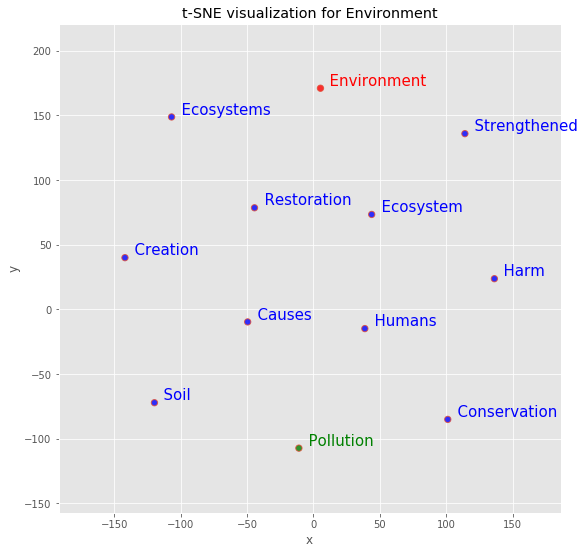

In [142]:
tsnescatterplot(model, 'environment', ['pollution'])

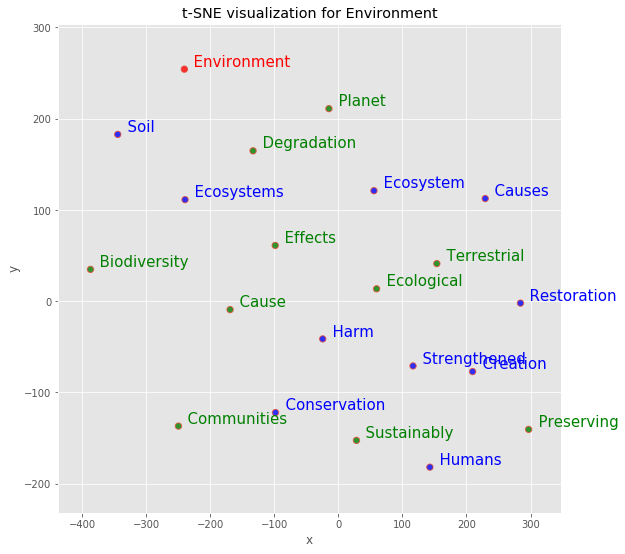

In [144]:
tsnescatterplot(model, "environment", [t[0] for t in model.wv.most_similar(positive=["environment"], topn=20)][10:])